In [ ]:
"""Atividade 8: Caminhadas Aleatórias."""
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [ ]:
def random_walk(steps: int, dimensions: int):
    current_pos = np.zeros(shape=(steps, dimensions))
    for i in range(steps):
        direction = np.random.uniform(low=-0.5, high=0.5, size=dimensions)
        current_pos[i] = direction + current_pos[i - 1]
    return current_pos

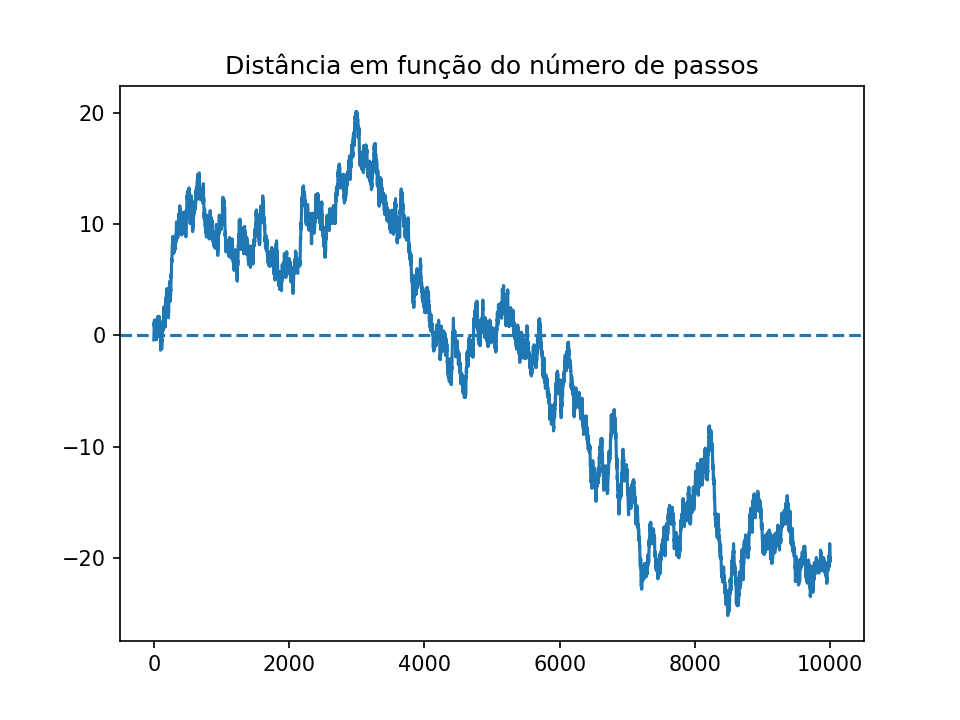

In [1]:
positions = random_walk(10000, 1)
plt.title("Distância em função do número de passos")
plt.plot(positions)
plt.axhline(y=0, linestyle="dashed")

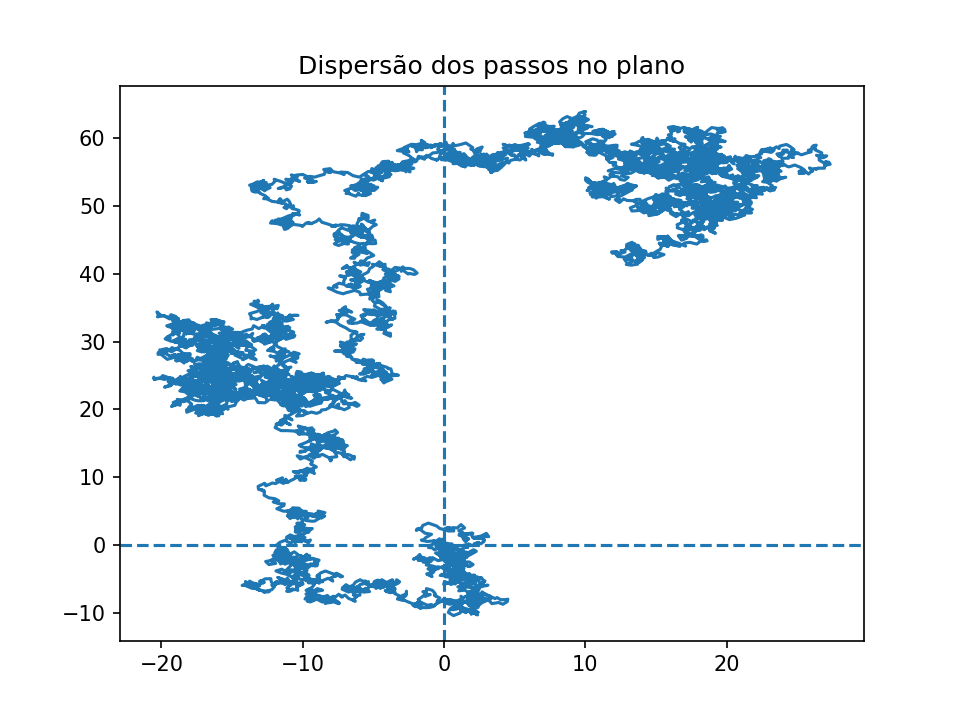

In [2]:
positions = random_walk(10000, 2)
plt.title("Dispersão dos passos no plano")
plt.plot(positions[:, 0], positions[:, 1])
plt.axhline(y=0, linestyle="dashed")
plt.axvline(x=0, linestyle="dashed")

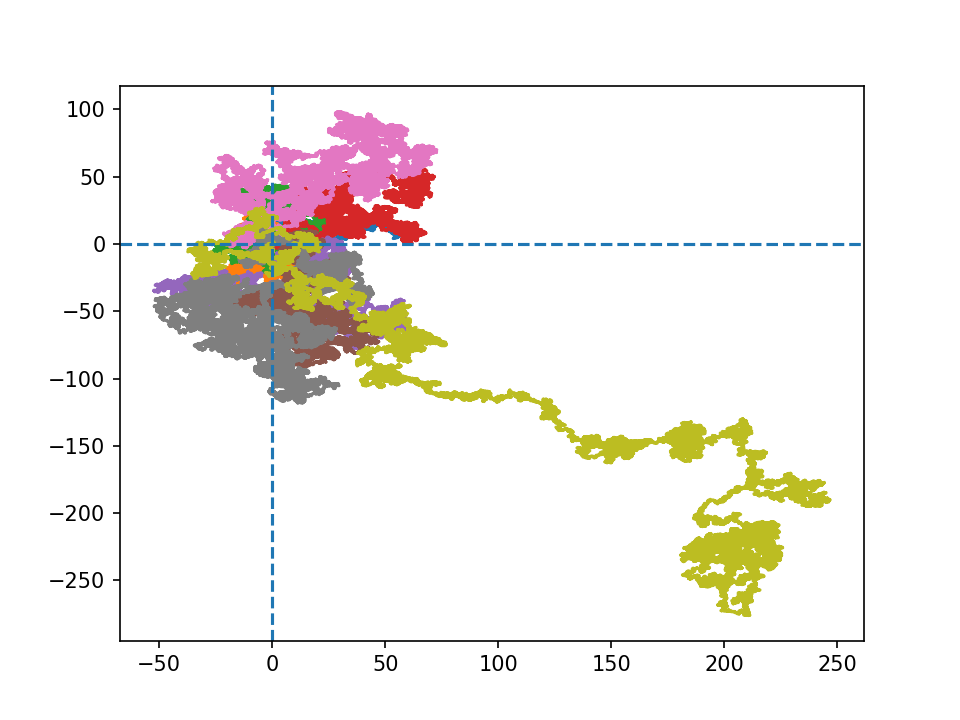

In [3]:
for _, j in enumerate(np.linspace(10_000, 100_000, 9)):
    z = int(round(j, 0))
    positions = random_walk(z, 2)
    plt.plot(positions[:, 0], positions[:, 1])
plt.axhline(y=0, linestyle="dashed")
plt.axvline(x=0, linestyle="dashed")
plt.title("Múltiplas dispersões para tamanhos diferentes")

In [ ]:
def final_walk(w: int):
    for i in [10, 1]:
        last = np.zeros(shape=(w, 2))
        for j in range(w):
            last_step = random_walk(i, 2)
            last[j] = np.array([last_step[-1, 0], last_step[-1, 1]])
        plt.scatter(x=last[:, 0], y=last[:, 1], s=0.2)

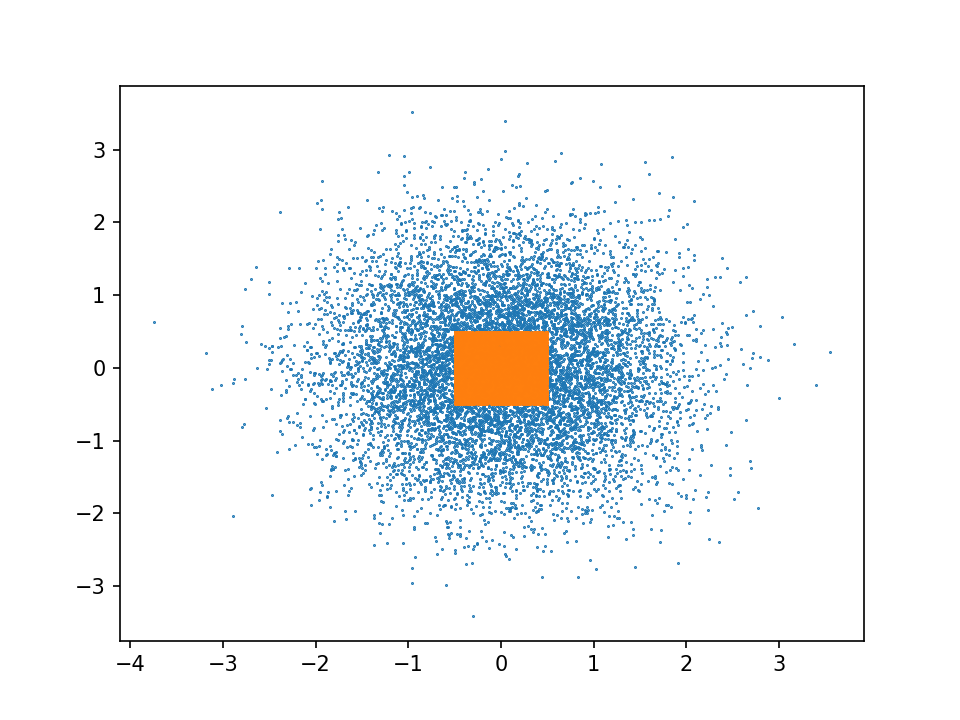

In [4]:
final_walk(10_000)

In [ ]:
def estimate(steps: int, w: int):
    walks = np.zeros(shape=(w, 1))
    for j in range(w):
        walk = random_walk(steps, 1)
        walks[j] = walk[-1, 0]

    # No enunciado fala pra usar isso aqui
    # rms = np.sqrt(np.mean(walks**2))

    bins = 50
    plt.hist(walks[:, 0], bins=bins)

    # Faz a "escala" do gráfico
    bin_width = (walks.max() - walks.min()) / bins
    hist_area = len(walks[:, 0]) * bin_width

    mu, std = norm.fit(walks)

    x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
    plt.plot(x, norm.pdf(x, mu, std) * hist_area, linestyle="dashed", color="black")

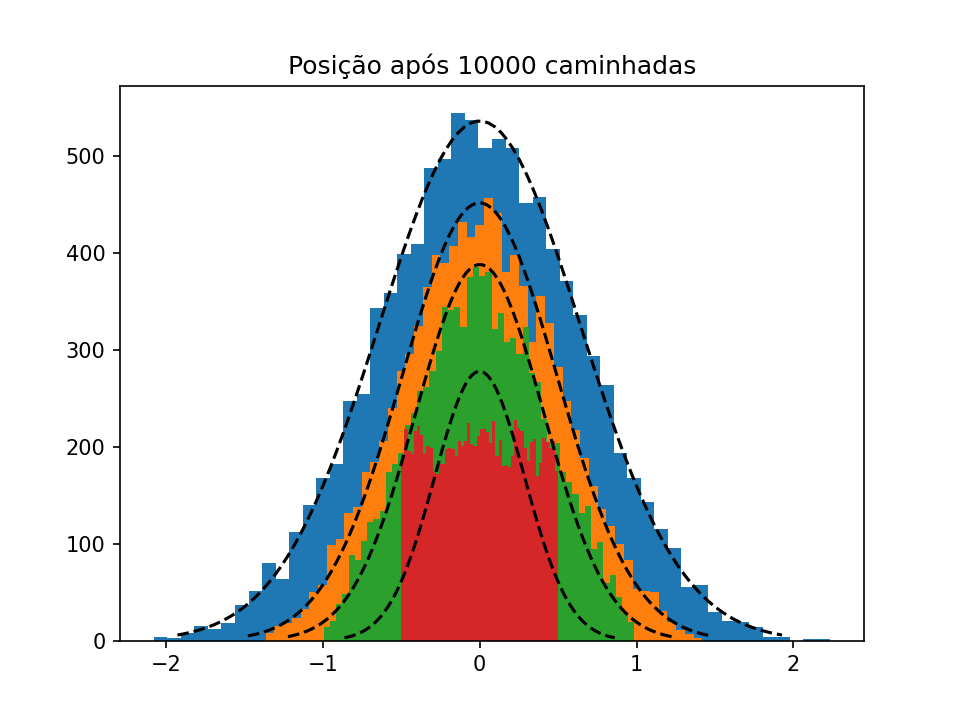

In [5]:
N = 10_000
for i in [5, 3, 2, 1]:
    estimate(i, N)
    plt.title(f"Posição após {N} caminhadas")